# MACD

**Convergência-Divergência da Média Móvel** - é o relacionamento entre duas médias móveis exponenciais (EMA) dos preços de uma ação.

**Cálculo:** É subtração da EMA de 12 com a EMA de 26.

```
MACD = 12_EMA - 26_EMA
```

**Como usar:** Calculamos uma nova EMA, dessa vez de 9 períodos, a qual chamamos de **Signal Line** e a comparamos com o MACD calculado acima. Quando a MACD a Signal Line cruza para cima, há uma indicação de compra. Analogamente, quando o MACD cruza a Signal Line para baixo, há uma indicação de venda.

In [25]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
# Datasource
ds_yahoo = 'yahoo'

# Período de um ano atrás a partir de hoje
last_year = datetime.datetime.now().year - 1
start = datetime.datetime.now().replace(year=last_year)
end = datetime.datetime.now()

In [27]:
# Recuperando dados da FLEURY
fleury = web.DataReader('FLRY3.SA', ds_yahoo, start, end)

## Calculando as Médias Móveis Exponenciais

In [28]:
# Calculando as EMAs de 12 e 26
fleury['12-EMA'] = fleury['Adj Close'].ewm(span=12, adjust=False).mean()
fleury['26-EMA'] = fleury['Adj Close'].ewm(span=26, adjust=False).mean()

# Gerando o MACD a partir das EMAs calculadas acima
fleury['MACD'] = fleury['12-EMA'] - fleury['26-EMA']

# Gerando a Signal line a partir da Linha de MACD
fleury['Signal Line'] = fleury['MACD'].ewm(span=9, adjust=False).mean()

## Gráfico MACD x Signal

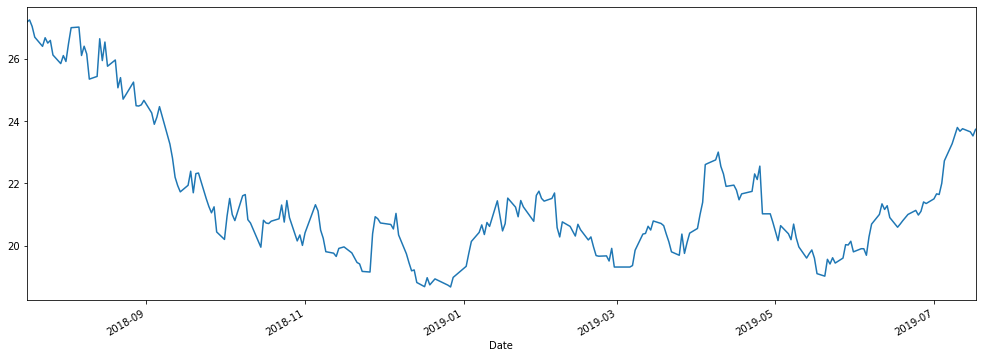

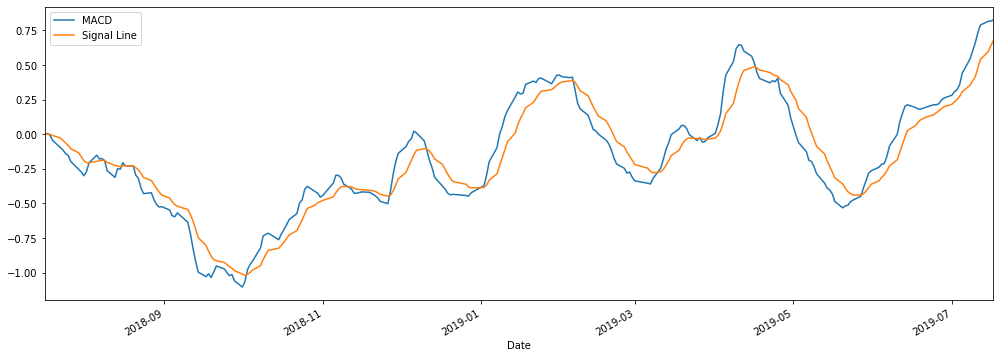

In [29]:
fleury['Adj Close'].plot(figsize=(17,6));
fleury[['MACD', 'Signal Line']].plot(figsize=(17,6));